## Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Airbnb_Price_Analysis\data\NYC-Airbnb-2023.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10056\3961808239.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Airbnb_Price_Analysis\data\NYC-Airbnb-2023.csv')


In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


In [4]:
data.shape

(42931, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  int64  
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  42931 non-null  int64  
 11  number_of_reviews               42931 non-null  int64  
 12  last_review                     

##### So as you can see that license columns has only 1 value and the rest values are null. So we can drop this column.

In [6]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [7]:
data.drop(['license'], axis=1, inplace=True)

In [8]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.293100e+04,4.293100e+04,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,32627.000000,42931.000000,42931.000000,42931.000000
mean,2.222772e+17,1.516012e+08,40.728273,-73.943665,200.307167,18.111178,25.856001,1.168988,24.054809,140.262211,7.736507
std,3.344213e+17,1.621301e+08,0.057640,0.056627,895.082911,27.462513,56.616344,1.789675,80.867958,142.001486,18.290256
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.940474e+07,1.608533e+07,40.687485,-73.981750,75.000000,2.000000,1.000000,0.140000,1.000000,0.000000,0.000000
50%,4.337482e+07,7.433812e+07,40.724040,-73.952620,125.000000,7.000000,5.000000,0.520000,1.000000,89.000000,0.000000
75%,6.305016e+17,2.680692e+08,40.762293,-73.924035,200.000000,30.000000,24.000000,1.670000,4.000000,289.000000,7.000000
max,8.404660e+17,5.038729e+08,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,86.610000,526.000000,365.000000,1093.000000


## Data Cleaning

In [9]:
data.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [10]:
data['name'].fillna('No Name', inplace=True)
data['host_name'].fillna('No Name', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10056\1985208912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['name'].fillna('No Name', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10056\1985208912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [11]:
data['last_review'] = pd.to_datetime(data['last_review'])
data['last_review'].fillna("Not reviewed", inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10056\911298021.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['last_review'].fillna("Not reviewed", inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10056\911298021.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not reviewed' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data['last_review'].fillna("Not reviewed", inplace=Tru

In [12]:
data['reviews_per_month'].fillna(data['reviews_per_month'].mean(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10056\800721707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews_per_month'].fillna(data['reviews_per_month'].mean(), inplace=True)


## Detecting Outlier In Price

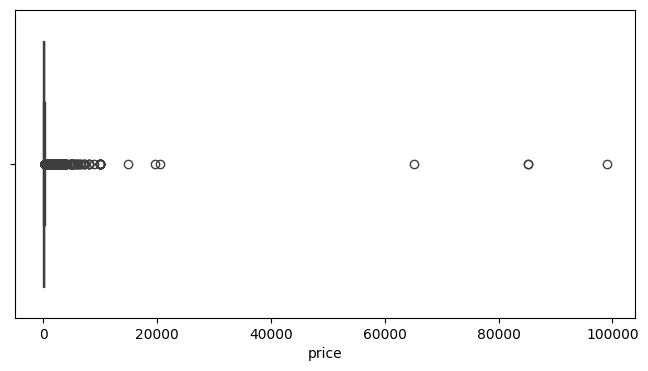

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['price'])
plt.show()

#### So as you can see that there are some outliers

In [14]:
data = data[data['price'] < data['price'].quantile(0.99)]

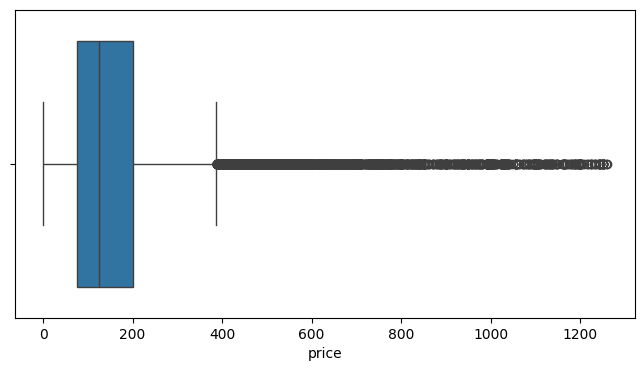

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['price'])
plt.show()

## Detecting outliers in every room type

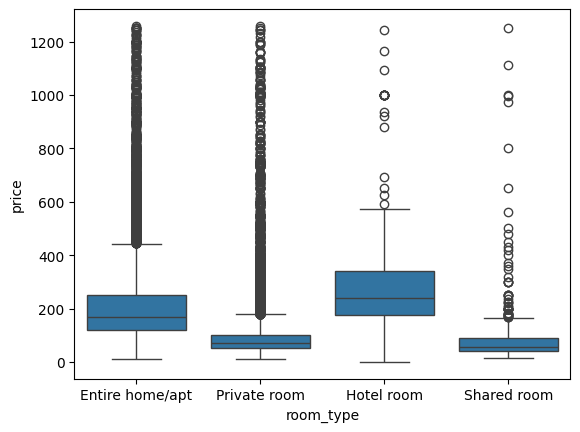

In [16]:
sns.boxplot(x=data['room_type'], y=data['price'])
plt.show()

In [17]:
for room_type in data['room_type'].unique():
    quartiles = data[data['room_type'] == room_type]['price'].quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr

    data.drop(data[(data['room_type'] == room_type) & (data['price'] > upper_bound)].index, inplace = True)

<Axes: xlabel='room_type', ylabel='price'>

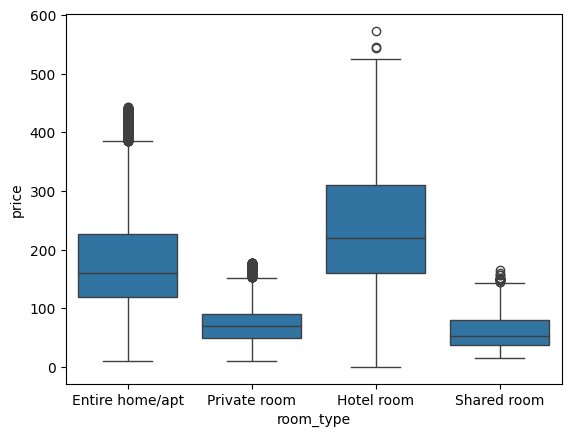

In [18]:
sns.boxplot(x = data['room_type'], y = data['price'])

## Outliers on review per month using z score

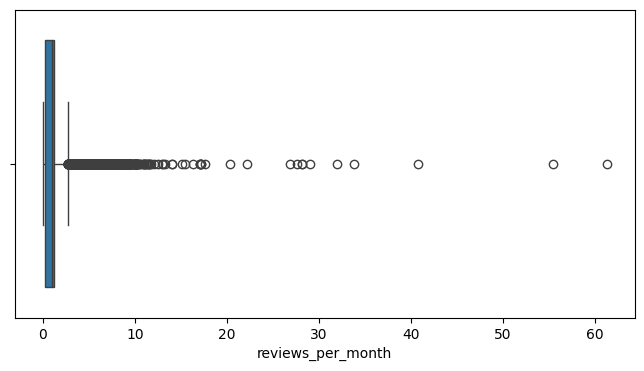

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['reviews_per_month'])
plt.show()

In [20]:
mean = data['reviews_per_month'].mean()
std_dev = data['reviews_per_month'].std()

data = data[(data['reviews_per_month'] > mean - 3 * std_dev) & (data['reviews_per_month'] < mean + 3 * std_dev)]

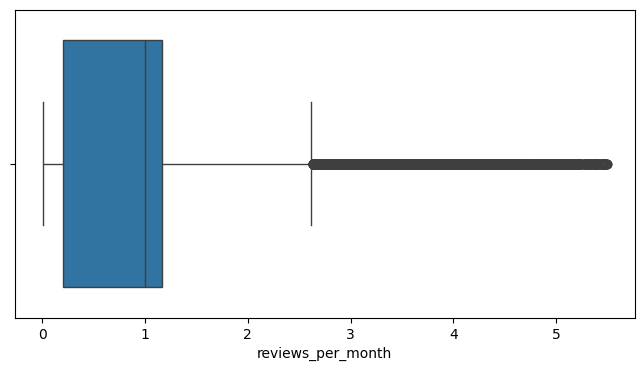

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['reviews_per_month'])
plt.show()

### Similarly, Outliers on number of reviews using z score

In [22]:
mean = data['number_of_reviews'].mean()
std_dev = data['number_of_reviews'].std()

data = data[(data['number_of_reviews'] > mean - 3 * std_dev) & (data['number_of_reviews'] < mean + 3 * std_dev)]

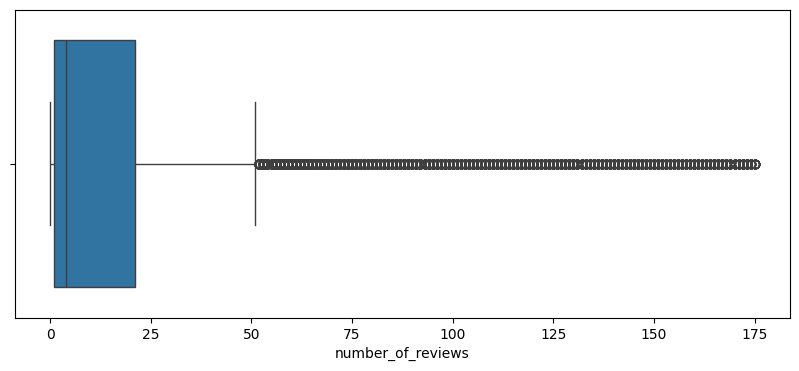

In [23]:
plt.figure(figsize=(10,4))
sns.boxplot(x="number_of_reviews", data=data)
plt.show()

In [24]:
data = data[~(data['reviews_per_month'] > 5)]

#### Now there is no outliers in our data

## Save cleaned data.

In [28]:
data.to_csv(r'C:\Users\Lenovo\Desktop\Airbnb_Price_Analysis\data\NYC-Airbnb-2023-Cleaned.csv', index=False, encoding='utf-8')